In [11]:
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [12]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [13]:
type(y_train)

numpy.ndarray

In [14]:
y_train.shape

(60000,)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
#type(y_train)
#y_train=y_train.astype('category')

In [17]:
#visualizing the data
def visualize(x):
    ids=np.random.choice(len(x),100, replace=False)
    images=x[ids].reshape(100,28,28)
    fig,ax=plt.subplots(10,10)
    for i in range(10):
        for j in range(10):
            img=images[i*10+j]
            ax[i][j].imshow(img, cmap='gray')
            ax[i][j].axis("off")
    fig.show

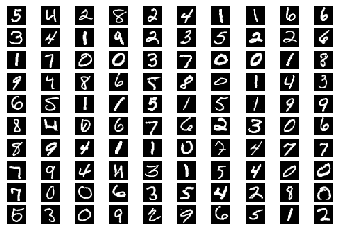

In [18]:
visualize(x_train)

In [19]:
#______________________________________________
#reshaping the data (adding one more dimension into the data) the data type will be numpy array

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
# converting the numpy array into float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#_____________________________
#normalizing the data(we do this step to increase the speed of the process) 
#normalizing converts the data into the range of 0 to 1
#we can  do standardization instead of normalization

x_train/=255
x_test/=255
#----------------------
#converting categorical data into vector form (onehot vector)
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

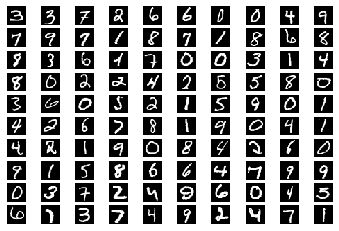

In [20]:
visualize(x_train)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
#creating convolution neural network

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
classifier=Sequential()


In [24]:

classifier.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
classifier.add(Conv2D(64,(3,3),activation='relu'))
#the above two layers are convolution  layers
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))
classifier.add(Flatten())
#hidden layer
classifier.add(Dense(256,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(10 ,activation='softmax'))

In [25]:
classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
classifier.fit(x_train,y_train,batch_size=5,nb_epoch=5)

C:\Users\dines\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/5
60000/60000 [==============================] - 400s 7ms/step - loss: 0.1495 - accuracy: 0.9542
Epoch 2/5
60000/60000 [==============================] - 394s 7ms/step - loss: 0.0721 - accuracy: 0.9790
Epoch 3/5
60000/60000 [==============================] - 390s 6ms/step - loss: 0.0582 - accuracy: 0.9828
Epoch 4/5
60000/60000 [==============================] - 390s 7ms/step - loss: 0.0470 - accuracy: 0.9860
Epoch 5/5
60000/60000 [==============================] - 384s 6ms/step - loss: 0.0433 - accuracy: 0.9872


In [27]:
#evaluating the test output with the help of x test(data)
y_pred=classifier.evaluate(x_test,y_test)

10000/10000 [==============================] - 8s 761us/step


In [29]:

print("loss=",y_pred[0],"accuracy=",y_pred[1])

loss= 0.0345087354073301 accuracy= 0.9882000088691711
